**<h2>BOARD GAME PROJECT <h2>**

**Loading the datasets of reviews and comments**

In [40]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
# Add the `src` folder to Python's module search path
sys.path.append(os.path.abspath("../src"))

from data_processing import load_datasets


In [41]:

# Define file paths 
reviews_path = "../data/review_of_games.csv"
comments_path = "../game_dataset/comments_on_games.csv"

# Load datasets
reviews_df, comments_df = load_datasets(reviews_path, comments_path)

**cleaning the unnecessary columns**

In [42]:
from data_processing import drop_columns

# Clean datasets
columns_to_drop_reviews = ['Unnamed: 0', 'URL', 'Thumbnail']
reviews_df = drop_columns(reviews_df, columns_to_drop_reviews)

columns_to_drop_comments = ['Unnamed: 0', 'comment']
comments_df = drop_columns(comments_df, columns_to_drop_comments)

#Print both dataset after dropping columns
print((comments_df.head()),"\n",(reviews_df.head()))

Dropping column: Unnamed: 0
Dropping column: URL
Dropping column: Thumbnail
Dropping column: Unnamed: 0
Dropping column: comment
              user  rating     ID      name
0          Torsten    10.0  30549  Pandemic
1  mitnachtKAUBO-I    10.0  30549  Pandemic
2           avlawn    10.0  30549  Pandemic
3       Mike Mayer    10.0  30549  Pandemic
4          Mease19    10.0  30549  Pandemic 
       ID         Name  Year  Rank  Average  Bayes average  Users rated
0  30549     Pandemic  2008   106     7.59          7.487       108975
1    822  Carcassonne  2000   190     7.42          7.309       108738
2     13        Catan  1995   429     7.14          6.970       108024
3  68448    7 Wonders  2010    73     7.74          7.634        89982
4  36218     Dominion  2008   104     7.61          7.499        81561


**Average VS Bayesian Average**

In [43]:
from data_processing import load_datasets, calculate_custom_bayesian
from graph_visualization import plot_low_vote_games_comparison, scatter_plot_votes_vs_ratings

global_avg = round((np.mean(reviews_df['Average'])),2)  # Global average rating
min_votes = int(np.mean(reviews_df['Users rated']))  # Mean
print(f"Global Average: {global_avg}, Minimum Votes: {min_votes}")

#Bayesian Average 
reviews_df['Custom Bayesian Average'] = calculate_custom_bayesian (reviews_df['Average'], reviews_df['Users rated'], global_avg, min_votes) 


Global Average: 6.42, Minimum Votes: 866


In [44]:
# Calculate the difference between the normal average and the weighted (custom) bayeasian for each game
reviews_df['Difference (Bayesian - Average)'] = reviews_df['Custom Bayesian Average'] - reviews_df['Average']

**Compare the top ranking based on average and bayesian average and analyze the results**

In [45]:

# PART 1: Top 10 Rankings Comparison
top_10_average = reviews_df.sort_values(by='Average', ascending=False).head(10)
top_10_bayesian = reviews_df.sort_values(by='Custom Bayesian Average', ascending=False).head(10)

print("\nTop 10 Games by Average:")
print(top_10_average[['Name', 'Average', 'Users rated']])

print("\nTop 10 Games by Custom Bayesian Average:")
print(top_10_bayesian[['Name', 'Custom Bayesian Average', 'Users rated']])



Top 10 Games by Average:
                                                    Name  Average  Users rated
18912                           Malhya: Lands of Legends     9.57           41
18429                                              Erune     9.56           43
14609                                        TerroriXico     9.43           70
17731  System Gateway (fan expansion for Android: Net...     9.40           47
15825                                           DEFCON 1     9.36           60
18180                                       Meeple Quest     9.31           45
12057                            Wings of the Motherland     9.29          101
19084                                             Aeolis     9.25           40
16040                     War Titans: Invaders Must Die!     9.24           58
21297                                        Gladiatoris     9.23           31

Top 10 Games by Custom Bayesian Average:
                                    Name  Custom Bayesian Avera

In [46]:
# Prepare top 10 by Average
top_10_average = reviews_df.sort_values(by='Average', ascending=False).head(10)[['Name']]
top_10_average['Rank (Average)'] = range(1, 11)

# Prepare top 10 by Custom Bayesian Average
top_10_bayesian = reviews_df.sort_values(by='Custom Bayesian Average', ascending=False).head(10)[['Name']]
top_10_bayesian['Rank (Bayesian)'] = range(1, 11)

# Reset indices to ensure alignment for concatenation
top_10_average.reset_index(drop=True, inplace=True)
top_10_bayesian.reset_index(drop=True, inplace=True)

# Combine into a single table for side-by-side comparison
comparison_table = pd.concat([top_10_average, top_10_bayesian], axis=1)

# Update column names for clarity
comparison_table.columns = ['Name (Average)', 'Rank (Average)', 'Name (Bayesian)', 'Rank (Bayesian)']

# Display the comparison table
print("\nSide-by-Side Comparison with Rankings (Name and Rank)")
print(comparison_table)



Side-by-Side Comparison with Rankings (Name and Rank)
                                      Name (Average)  Rank (Average)  \
0                           Malhya: Lands of Legends               1   
1                                              Erune               2   
2                                        TerroriXico               3   
3  System Gateway (fan expansion for Android: Net...               4   
4                                           DEFCON 1               5   
5                                       Meeple Quest               6   
6                            Wings of the Motherland               7   
7                                             Aeolis               8   
8                     War Titans: Invaders Must Die!               9   
9                                        Gladiatoris              10   

                       Name (Bayesian)  Rank (Bayesian)  
0                           Gloomhaven                1  
1                    Brass: Birmingh

**Identify Low-Vote Games with High Averages**


Games with Few Votes and High Averages:
                                                    Name  Average  \
18912                           Malhya: Lands of Legends     9.57   
18429                                              Erune     9.56   
14609                                        TerroriXico     9.43   
17731  System Gateway (fan expansion for Android: Net...     9.40   
15825                                           DEFCON 1     9.36   
...                                                  ...      ...   
15801                         La Batalla de los Arapiles     8.01   
10710                                   El Valle Secreto     8.01   
13363                                      Footy Manager     8.01   
10802                           Marne 1918: Friedensturm     8.01   
19336  Savage Worlds Showdown: Miniatures Rules for A...     8.01   

       Users rated  Custom Bayesian Average  
18912           41                 6.562393  
18429           43                 6.5

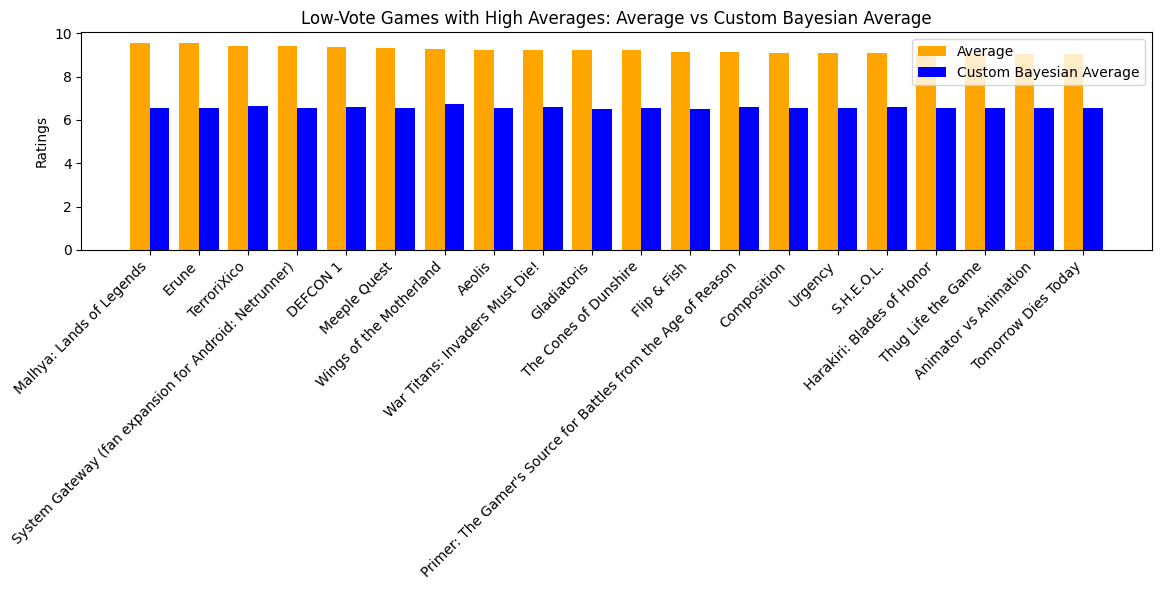

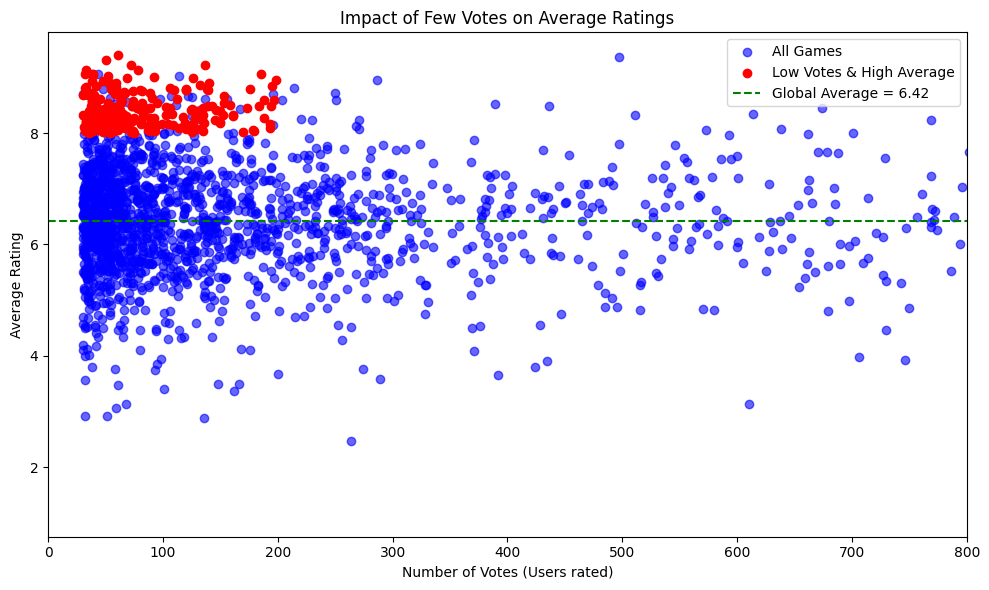

In [47]:
low_votes_threshold = 200  # Define low votes as less than 200
low_votes_high_average = reviews_df[
    (reviews_df['Users rated'] < low_votes_threshold) & (reviews_df['Average'] > 8.0)
].sort_values(by='Average', ascending=False)

print("\nGames with Few Votes and High Averages:")
print(low_votes_high_average[['Name', 'Average', 'Users rated', 'Custom Bayesian Average']])

# Limit to top 20 games for visualization
top_low_votes_high_average = low_votes_high_average.head(20)

# Plot comparison for low-vote games
plot_low_vote_games_comparison(top_low_votes_high_average)

# Create scatter plot showing the problem
scatter_plot_votes_vs_ratings(reviews_df, low_votes_high_average, global_avg)



**Comment-Reviews Correlation**

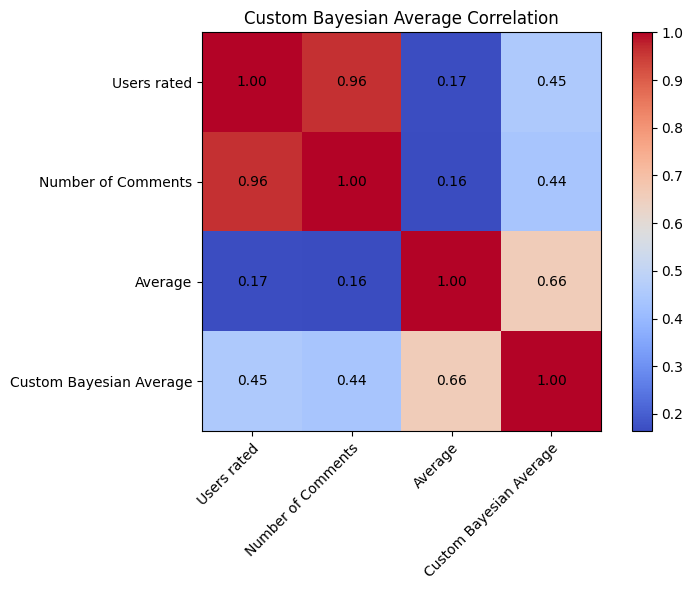

In [48]:
from graph_visualization import plot_correlation_heatmap

# Standardize column names
reviews_df = reviews_df.rename(columns={'Name': 'name'})
comments_count = comments_df.groupby('name').size().reset_index(name='Number of Comments')
# Merge reviews and comments data
merged_df = pd.merge(reviews_df, comments_count, on='name', how='inner')

# Calculate the difference between votes and comments
merged_df['Votes - Comments'] = np.subtract(merged_df['Users rated'], merged_df['Number of Comments'])

# Compute correlation matrix dynamically 
correlation_matrix = merged_df[['Users rated', 'Number of Comments', 'Average', 'Custom Bayesian Average']].corr().to_numpy()
labels = ['Users rated', 'Number of Comments', 'Average', 'Custom Bayesian Average']

#plot the heatmap 
plot_correlation_heatmap(correlation_matrix, labels, title="Custom Bayesian Average Correlation")

**<h4> INTERACTIVE GAME: find the ranking of your favorite board game <h4>**

In [ ]:
from data_processing import find_game_position

while True:
    print("\n--- Board Game Ranking Finder ---")
    game_name = input("Enter the name of your favorite board game (or type 'exit' to quit): ").strip()
    
    if game_name.lower() == 'exit':
        print("Thanks for playing! Goodbye!")
        break
    
    position_average, position_custom = find_game_position(game_name, reviews_df)
    
    if position_average and position_custom:
        print(f"\nGame: {game_name}")
        print(f"Position by Normal Average: {position_average}")
        print(f"Position by Custom Bayesian Average: {position_custom}")
    else:
        print(f"\nSorry, the game '{game_name}' was not found in the dataset.")


ImportError: cannot import name 'find_game_position' from 'data_processing' (c:\Users\simon\OneDrive\Desktop\boardgamesample\board-games-project\src\data_processing.py)